## Geometric and intensity transformations

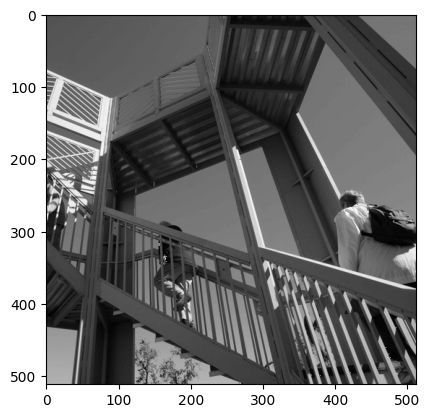

In [62]:
import scipy as sc
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
#install skimage: pip install scikit-image
import skimage
from skimage import transform

from scipy import ndimage
from scipy import datasets
f = datasets.ascent() # retrieve a grayscale image
imshow(f, cmap=plt.cm.gray)

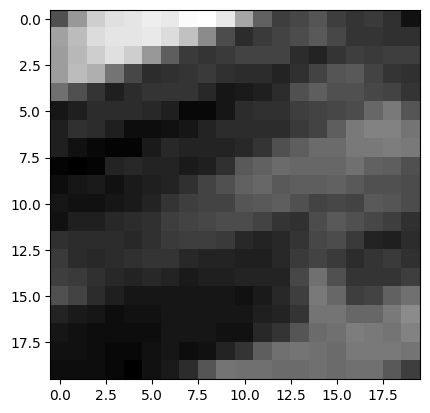

In [63]:
# Explore intensity variations
imshow(f[220:240, 110:130], cmap=plt.cm.gray, interpolation='nearest') 

In [64]:
## Geometric transformations
lx, ly = f.shape
# Cropping
crop_f = f[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_f = np.flipud(f)
# rotation
rotate_f = ndimage.rotate(f, 45)
rotate_f_noreshape = ndimage.rotate(f, 45, reshape=False)

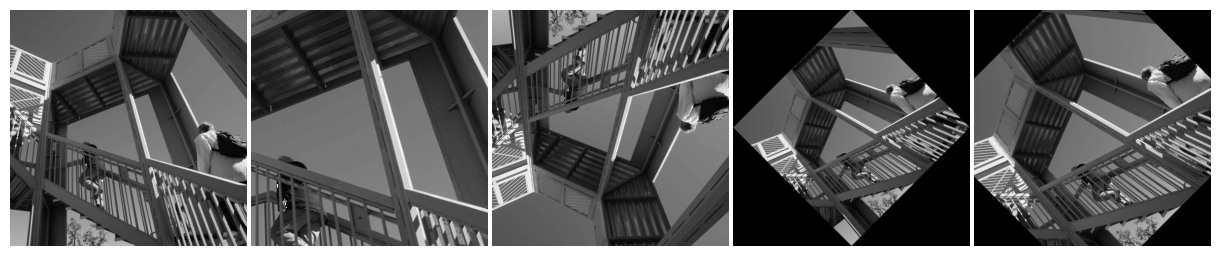

In [65]:

plt.figure(figsize=(12, 3))
plt.subplot(151)
imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
imshow(crop_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
imshow(flip_ud_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
imshow(rotate_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
imshow(rotate_f_noreshape, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

### Translation

Text(0.5, 1.0, 'Translated image')

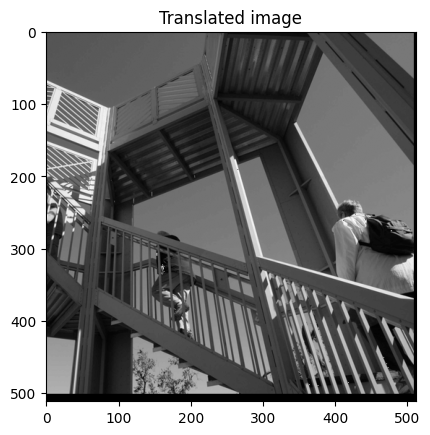

In [66]:
# Recall the shape of the transformation matrix
#[[a0  a1  a2]
# [b0  b1  b2]
# [0   0    1]]
# Lets translate by dx=3 and dy=10 pixels
transl=np.array([[1,0,3],[0,1,10],[0,0,1]])
transl=transl.reshape((3,3))
imshow(transl, cmap='gray')

tf=transform.AffineTransform(matrix=transl, scale=None, rotation=None, shear=None, translation=None)
transl=transform.warp(f, tf, order =1, preserve_range=True, mode='constant')
imshow(transl, cmap='gray')
plt.title("Translated image")

### Shear

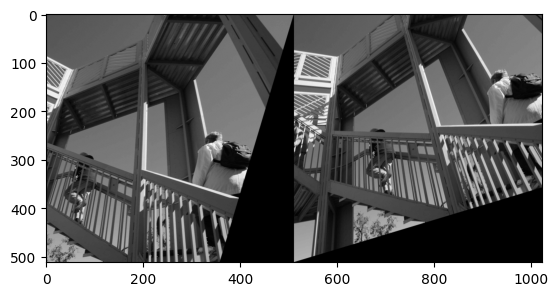

In [67]:
# horizontal
f=f/255.0 # scale to the pixel intensity range (0,1) 
shear1=np.array([[1, 0.3 , 0.0],[0, 1, 0],[0,0,1]])
tf_h=transform.AffineTransform(matrix=shear1, scale=None, rotation=None, shear=None, translation=None)
im1=transform.warp(f, tf_h, order =1, preserve_range=True, mode='constant')
# vertical
shear2=np.array([[1, 0.0 , 0.0],[0.3, 1, 0],[0,0,1]])
tf_v=transform.AffineTransform(matrix=shear2, scale=None, rotation=None, shear=None, translation=None)
im2=transform.warp(f, tf_v, order =1, preserve_range=True, mode='constant')

plt.figure()
imshow(np.hstack([im1,im2]), cmap='gray')

In [68]:
tf_v

<AffineTransform(matrix=
    [[1. , 0. , 0. ],
     [0.3, 1. , 0. ],
     [0. , 0. , 1. ]]) at 0x126fb12d0>

### Rescaling

In [69]:
f_rescaled=transform.rescale(f, 0.5, anti_aliasing=False)

Text(0.5, 1.0, 'Rescaled image by 50%')

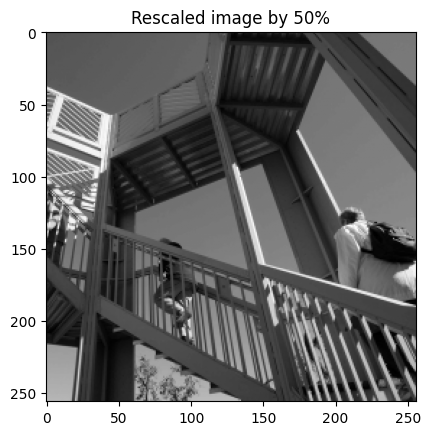

In [70]:
imshow(f_rescaled, cmap='gray')
plt.title("Rescaled image by 50%")

### Resizing 

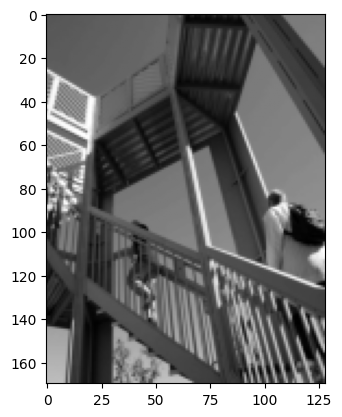

In [71]:
f_resized=transform.resize(f, (int(f.shape[0]/3), f.shape[1]/4), anti_aliasing=True)
imshow(f_resized, cmap='gray')

In [72]:
np.shape(f_resized)

(170, 128)

### Rotation with transform.rotate 

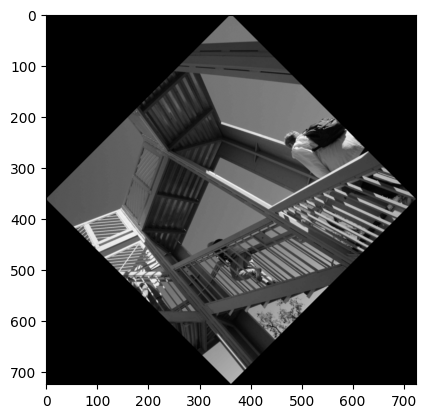

In [73]:
import math

tf=transform.rotate(f, 45, resize=True, mode='constant')
im=tf*255
imshow(im, cmap='gray')


### Question 1:
#### 1.  Using Python skimage.transform functions considered above, perform a horizontal shear by 0.2 and image rescaling by 50% on 'ascent' image (referred to as f).Display the final result.
#### 2. Define a translation matrix for shifting an image by 5 pixels in x-direction and by 10 pixels in y-direction, and apply AffineTransform to translate the image (f=ascent). Display the final result.
#### 3. Start with ascent image (f). Perform a consequent series of operations on an image f, rotate  an image by -45 degrees, then rescale the rotated image by 1.2 and crop it to the 50% of its central part.  


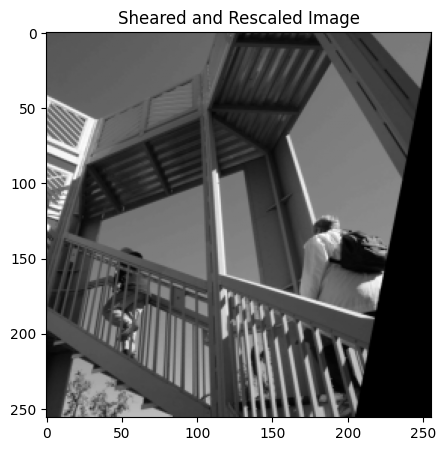

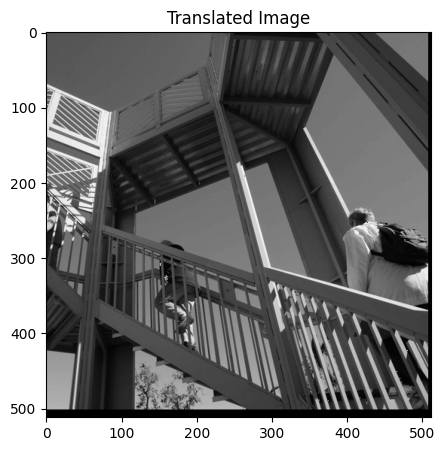

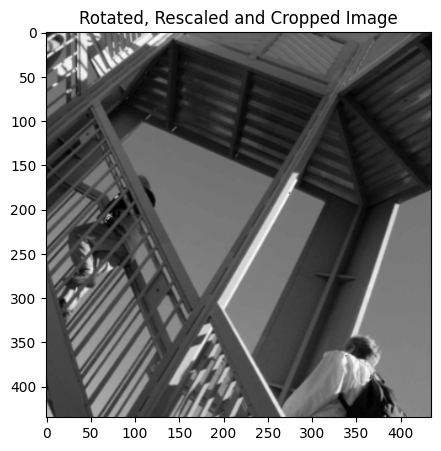

In [74]:
# Leave your answer here

# 1. Horizontal shear and rescaling
# First apply horizontal shear
shear_matrix = np.array([[1, 0.2, 0.0], [0, 1, 0], [0, 0, 1]])
tf_shear = transform.AffineTransform(matrix=shear_matrix)
sheared_img = transform.warp(f, tf_shear, order=1, preserve_range=True, mode='constant')

# Then rescale by 50%
final_img = transform.rescale(sheared_img, 0.5, anti_aliasing=True)

plt.figure(figsize=(10, 5))
plt.imshow(final_img, cmap='gray')
plt.title('Sheared and Rescaled Image')
plt.show()

# 2. Translation
trans_matrix = np.array([[1, 0, 5], [0, 1, 10], [0, 0, 1]])
tf_trans = transform.AffineTransform(matrix=trans_matrix)
translated_img = transform.warp(f, tf_trans, order=1, preserve_range=True, mode='constant')

plt.figure(figsize=(10, 5))
plt.imshow(translated_img, cmap='gray')
plt.title('Translated Image')
plt.show()

# 3. Series of operations
# First rotate by -45 degrees
rotated = transform.rotate(f, -45, resize=True)

# Rescale by 1.2
rescaled = transform.rescale(rotated, 1.2, anti_aliasing=True)

# Crop to central 50%
h, w = rescaled.shape
crop_h = int(h/4)
crop_w = int(w/4)
cropped = rescaled[crop_h:-crop_h, crop_w:-crop_w]

plt.figure(figsize=(10, 5))
plt.imshow(cropped, cmap='gray')
plt.title('Rotated, Rescaled and Cropped Image')
plt.show()


### Gamma correction and log contrast adjustment

Text(0.5, 0, 'Pixel intensity')

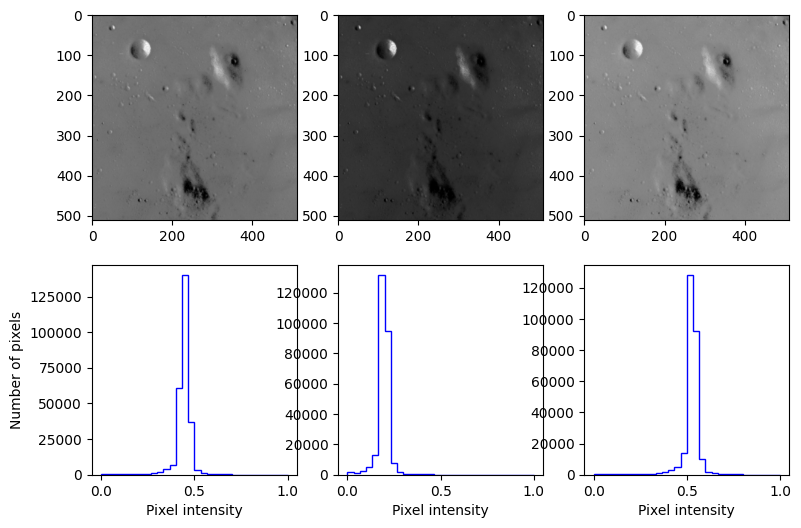

In [75]:
from skimage import data, img_as_float
from skimage import exposure

# Load a low-contrast image
im = data.moon()
im= img_as_float(im)

fig=plt.figure(figsize=(9,6))
axes=np.zeros((2,3), dtype=object)
axes[0,0]=plt.subplot(2,3,1)
axes[0,1]=plt.subplot(2,3,2)
axes[0,2]=plt.subplot(2,3,3)

axes[1,0]=plt.subplot(2,3,4)
axes[1,1]=plt.subplot(2,3,5)
axes[1,2]=plt.subplot(2,3,6)
ax_im, ax_hist = axes

# Gamma corrected
gamma_corrected = exposure.adjust_gamma(im, 2)

# logarithmic corrected
logarithmic_corrected = exposure.adjust_log(im, 1)

#__________________________
# Display image
ax_im[0].imshow(im, cmap='gray')
#Display histogram for original image
ax_hist[0].hist(im.ravel(), bins=30, histtype='step', color='b' )
ax_hist[0].set_xlabel('Pixel intensity')
ax_hist[0].set_ylabel('Number of pixels')

ax_im[1].imshow(gamma_corrected, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[1].hist(gamma_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[1].set_xlabel('Pixel intensity')

ax_im[2].imshow(logarithmic_corrected, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[2].hist(logarithmic_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[2].set_xlabel('Pixel intensity')


### Question 2: 
1. Describe the effect of Gamma-correction on the distribution of pixel intensities.
2. How does logarithmic transformation improve the quality of an image?
3. Perform Gamma-transformation of the moon image with the value of  $\gamma$ < 1. What effect do you observe on pixel intensities of the original image? How is you result compared against Gamma-corrected pixel intensities obtained with $\gamma$=2?


**Answers:**
1. Effect of Gamma-correction (γ=2) on pixel intensities:
   - Gamma correction with γ>1 darkens the image
   - In the histogram, most pixel values shift toward the lower intensities.
   - Relatively bright pixels remain bright, but the midrange and darker pixels are pulled further down.

2. Logarithmic transformation effects:
   - Compresses the dynamic range of high intensity values
   - Expands the range of lower intensity values
   - Useful for enhancing details in darker regions
   - Particularly effective for images with large variations in intensity


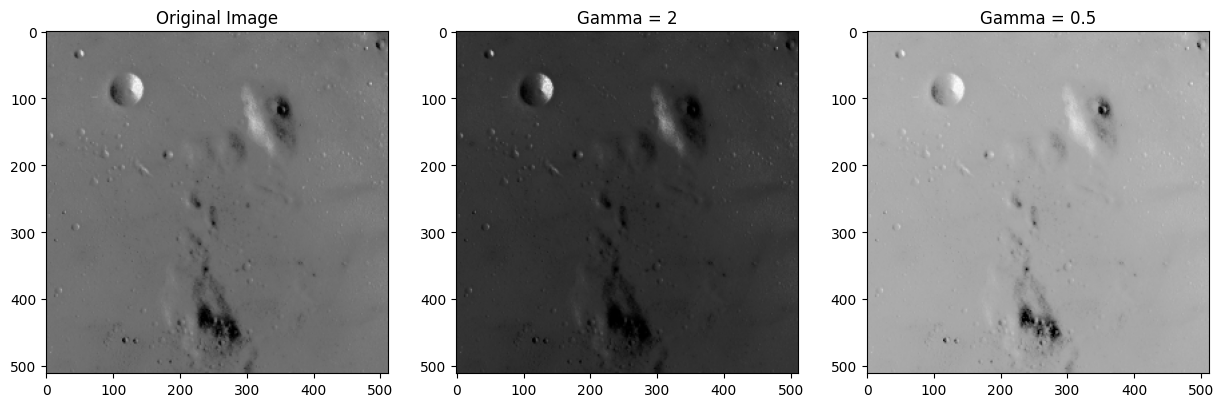

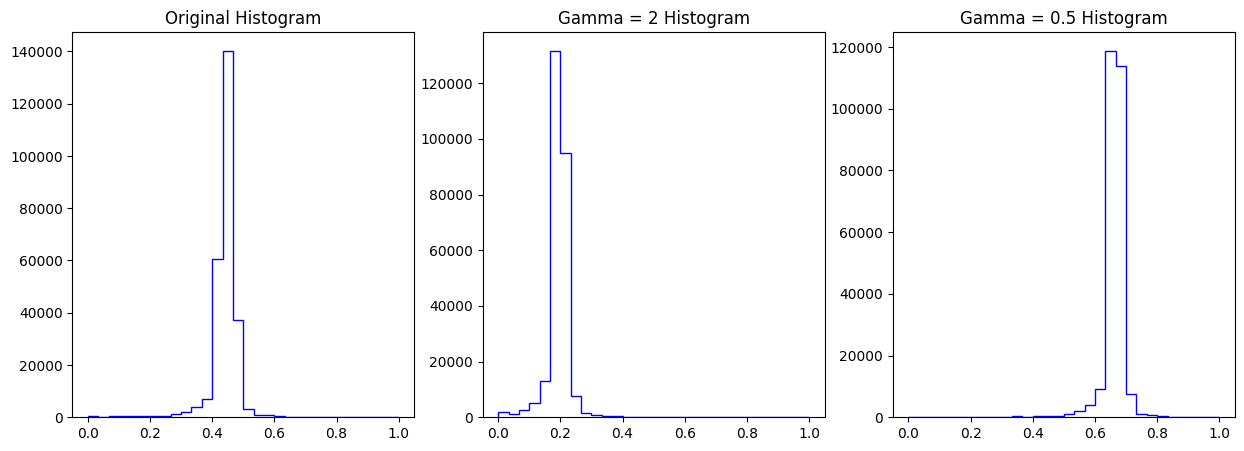

In [76]:
# Leave your answer here

# 3. Gamma transformation with gamma < 1
gamma_less_than_1 = exposure.adjust_gamma(im, 0.5)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Original image
ax1.imshow(im, cmap='gray')
ax1.set_title('Original Image')

# Gamma = 2 (from previous example)
ax2.imshow(gamma_corrected, cmap='gray')
ax2.set_title('Gamma = 2')

# Gamma = 0.5
ax3.imshow(gamma_less_than_1, cmap='gray')
ax3.set_title('Gamma = 0.5')
plt.show()

# Display histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.hist(im.ravel(), bins=30, histtype='step', color='b')
ax1.set_title('Original Histogram')

ax2.hist(gamma_corrected.ravel(), bins=30, histtype='step', color='b')
ax2.set_title('Gamma = 2 Histogram')

ax3.hist(gamma_less_than_1.ravel(), bins=30, histtype='step', color='b')
ax3.set_title('Gamma = 0.5 Histogram')
plt.show()


3. Effects of γ<1 (0.5):
   - Brightens the image compared to the original
   - Expands the range of higher intensity values
   - Histogram shifts towards higher intensity values
   - Compresses the range of lower intensity values
   - Compared to γ=2:
     * Shows opposite effect (brightening vs darkening)
     * Enhances details in brighter regions instead of darker ones
     * Histogram shifts towards higher intensity values vs the lower ones in γ=2.